# mnist dataset 손글씨 인식 - Basic Fully Connected Layer

In [28]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7)

import tensorflow as tf
from tensorflow.keras import layers

np.random.seed(102)

print(tf.__version__)
print(tf.keras.__version__)

1.13.1
2.2.4-tf


In [29]:
# load mnist data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [31]:
X_train[0][15]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

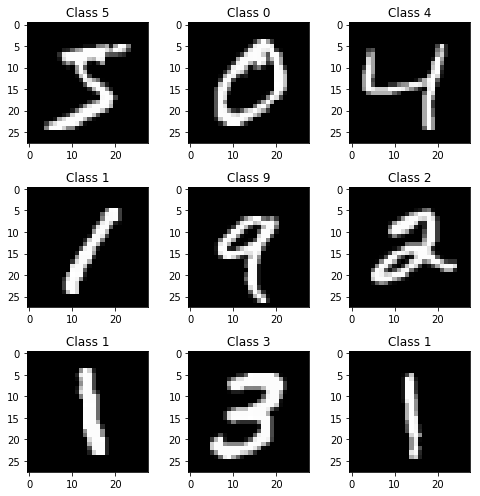

In [32]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
    plt.tight_layout()

plt.show()

In [6]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

X_train_scaled = X_train.reshape(-1, 784).astype("float32")
X_test_scaled  = X_test.reshape(-1, 784).astype("float32")

print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


Target label 을 one-hot format, i.e.

0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]  
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]  
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]  
etc.

In [7]:
Y_train = tf.keras.utils.to_categorical(y_train)
Y_test = tf.keras.utils.to_categorical(y_test)

print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


In [8]:
N_NEURONS = 128
DROPOUT = 0.2
EPOCHS = 20
BATCH_SIZE = 128

In [9]:
# 2 : Hidden Layers
model = tf.keras.Sequential()
model.add(layers.Dense(N_NEURONS, input_shape=(784,), kernel_initializer='glorot_normal'))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(DROPOUT))

model.add(layers.Dense(N_NEURONS))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(DROPOUT))

model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
__________

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_scaled, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_split=0.2)

In [13]:
score = model.evaluate(X_test_scaled, Y_test)

10000/10000 [==============================] - 1s 57us/sample - loss: 1.0071 - acc: 0.9369


In [14]:
print("Test score :", score[0])          # evaluation of loss function
print("Test accuracy :", score[1])

Test score : 1.007148865247146
Test accuracy : 0.9369


In [15]:
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test_scaled)

In [16]:
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [17]:
print(correct_indices.shape)
print(incorrect_indices.shape)

(9369,)
(631,)


In [18]:
correct_indices[:9]

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

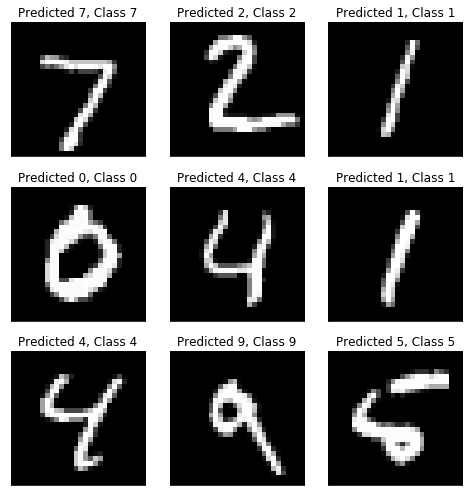

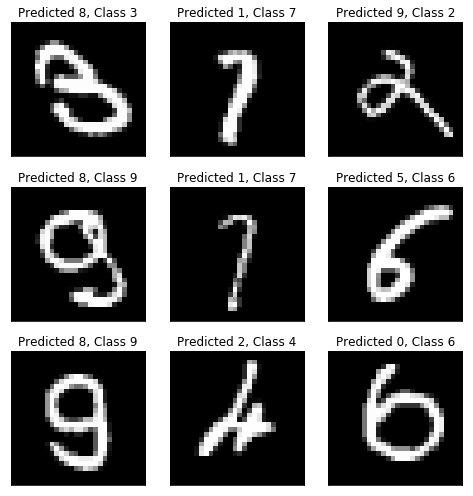

In [34]:
plt.figure()
for i, idx in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[idx], y_test[idx]))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    
plt.figure()
for i, idx in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[idx], y_test[idx]))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

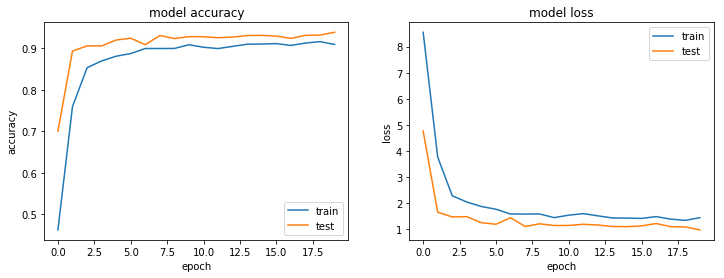

In [35]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test']);

In [36]:
np.argmax(model.predict(X_test[5].reshape((1,784))))

1

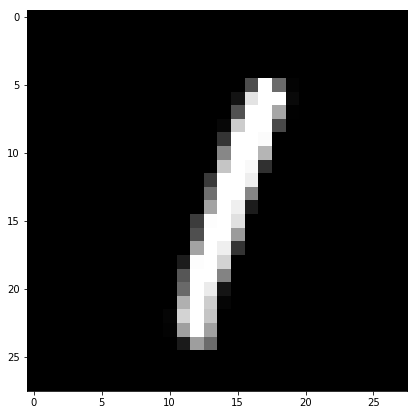

In [37]:
plt.imshow(X_test[5].reshape(28,28), cmap='gray')

# 실습 : fashion MNIST 를 이용하여 위와 동일한 작업

Label	Class

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

In [38]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [39]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

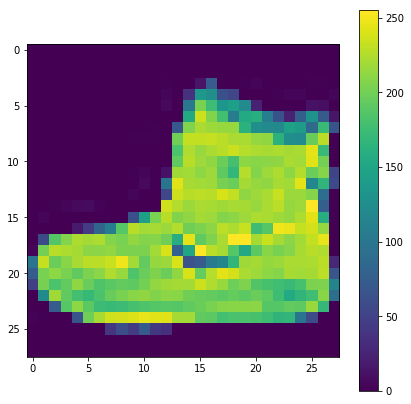

In [40]:
plt.imshow(train_images[0])
plt.colorbar()

In [41]:
train_images = train_images / 255.0
test_images = test_images / 255.0

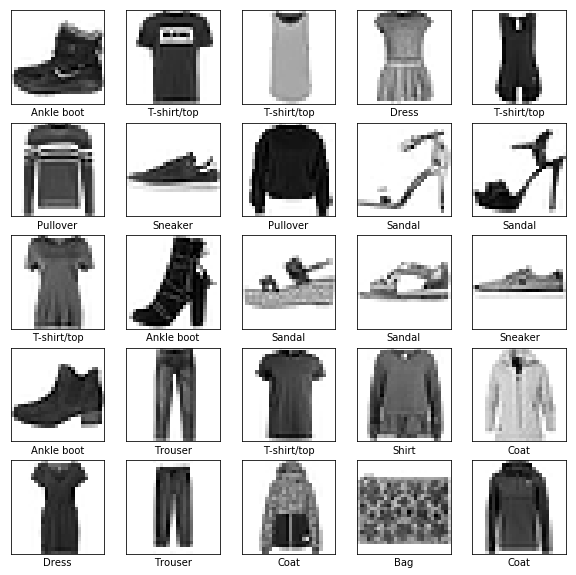

In [42]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])